<a href="https://colab.research.google.com/github/lucidCrafts/KH_Course_Exercises_Repository/blob/main/Hyperparameters_and_Tuning_for_Random_Forest_Hands_on_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [ ]:
pima_dataset = pd.read_csv("/content/diabetes.csv")
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = pima_dataset.drop(['Outcome'], axis=1)
y = pima_dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [ ]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0    0.651466
1    0.348534
Name: Outcome, dtype: float64
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
# Set folds
k=5

# Define grid
parameters = {'n_estimators': [100, 500], 'max_depth': [3, 5]}

In [ ]:
parameters

{'n_estimators': [100, 500], 'max_depth': [3, 5]}

In [ ]:
grid_search = GridSearchCV(model, parameters, cv = k, scoring = "roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 500]},
             scoring='roc_auc')

In [ ]:
pd.DataFrame((grid_search.cv_results_)).sort_values("rank_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.120040,0.002717,0.010361,0.000386,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.819186,0.850291,0.815116,0.836628,0.858929,0.836030,0.017025,1
3,0.608295,0.007492,0.047720,0.009631,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.813953,0.853198,0.810465,0.841279,0.854167,0.834612,0.018879,2
1,0.626837,0.094243,0.044995,0.006427,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.819477,0.848837,0.798547,0.836919,0.862500,0.833256,0.022388,3
0,0.268105,0.164973,0.029903,0.019122,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.818023,0.847093,0.796802,0.822965,0.858036,0.828584,0.021740,4


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Train model on the full training set with best estimator
best_model = grid_search.best_estimator_

# Fit the model on training data
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

0.8550488599348535
Training Dataset Accuracy: 0.8550488599348535 , Test Dataset Accuracy: 0.7272727272727273
Training Dataset ROC AUC Score: 0.9397780373831776 , Test Dataset ROC AUC Score: 0.8092592592592592


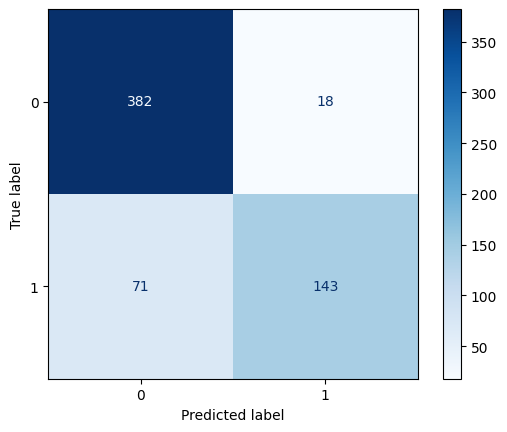

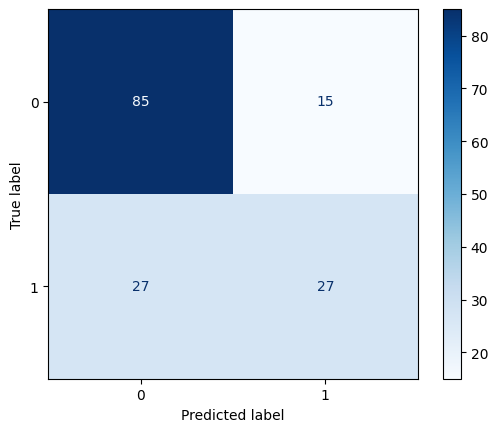

In [ ]:
## Training data confusion matrix
y_pred = best_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.plot(cmap = "Blues");

## Test data confusion matrix
y_pred = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
plt.plot(cmap = "Blues");

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

accuracy = (TN + TP)/(TN + FP + FN + TP)
print(accuracy)

# Model Performance (Accuracy) of the training data
accuracy_train = best_model.score(X_train, y_train)

# Model Performance (Accuracy) of the test data
accuracy_test = best_model.score(X_test, y_test)

print('Training Dataset Accuracy: ' + str(accuracy_train), ', Test Dataset Accuracy: ' + str(accuracy_test))

## Get the probability of predicting 1 on training data
y_pred = best_model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)

## Get the probability of predicting 1 on test data
y_pred = best_model.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, y_pred)

print('Training Dataset ROC AUC Score: ' + str(auc_train), ', Test Dataset ROC AUC Score: ' + str(auc_test))